In [4]:
%matplotlib inline
import pickle
import tensorflow as tf
import gpflow
import numpy as np

from multi_spectralmixture import MultiSpectralMixture as MOSM
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn 

seaborn.set(style="white", color_codes=True)

#Generate sample data
N_sample = 100
X_sample = np.linspace(-5, 5, N_sample)
Y1_sample = np.sin(X_sample) + np.random.randn(N_sample)
Y2_sample = np.cos(X_sample) + np.random.randn(N_sample)

#
X_obs = np.vstack([np.column_stack([np.zeros_like(Y1_sample), X_sample]), 
                  np.column_stack([np.ones_like(Y2_sample), X_sample])])
Y_obs = np.hstack([Y1_sample, Y2_sample])[:, None]

In [10]:
INPUT_DIM = 1
N_OUTPUTS = 2
#weights_init = np.ones(N_OUTPUTS)
#means_init = 0.5 * np.ones(N_OUTPUTS)[None, :]
#var_init = np.ones(N_OUTPUTS)[None, :]
#delay_init = np.zeros(N_OUTPUTS)[None, :]
#phase_init = np.zeros(N_OUTPUTS)

#kern = MOSM(1, N_OUTPUTS, weights_init, 
#            means_init, var_init, 
#            delay_init, phase_init)


#For more spectral components, just sum kernels
kern = MOSM(INPUT_DIM, N_OUTPUTS) + MOSM(INPUT_DIM, N_OUTPUTS)

model = gpflow.models.GPR(X_obs, Y_obs, kern)
model.likelihood.variance = 0.5

In [11]:
gpflow.train.ScipyOptimizer().minimize(model, disp=True, maxiter=500)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 291.215179
  Number of iterations: 55
  Number of functions evaluations: 66


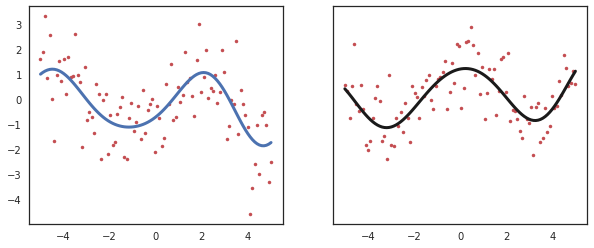

In [20]:
Y_star, STD_star = model.predict_f(X_obs)  #predict at inputs given by X_obs

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
axes[0].plot(X_sample, Y1_sample, 'r.')
axes[0].plot(X_sample, Y_star[0:N_sample], 'b-', lw=3)
#axes[0].fill_between(X_sample, (Y_star[0:N_sample]-2*STD_star[0:N_sample]).reshape([-1]), 
#                     (Y_star[0:N_sample]+2*STD_star[0:N_sample]).reshape([-1]), alpha=0.2) 

axes[1].plot(X_sample, Y2_sample, 'r.')
axes[1].plot(X_sample, Y_star[N_sample:], 'k-', lw=3)

In [21]:
print(model)

<Parameter name:GPR/kern/multispectralmixture_1/constant [trainable] shape:(2,) transform:(none) prior:None>
value: [ -3.84687566e-05,  -7.03369030e-06]

<Parameter name:GPR/kern/multispectralmixture_1/mean [trainable] shape:(1, 2) transform:(none) prior:None>
value: [[ 1.46429348,  0.76948389]]

<Parameter name:GPR/kern/multispectralmixture_1/variance [trainable] shape:(1, 2) transform:+ve prior:None>
value: [[ 0.68896741,  0.67867252]]

<Parameter name:GPR/kern/multispectralmixture_1/delay [trainable] shape:(1, 2) transform:PartiallyFixed prior:None>
value: [[ 0.        ,  0.66747368]]

<Parameter name:GPR/kern/multispectralmixture_1/phase [trainable] shape:(2,) transform:PartiallyFixed prior:None>
value: [ 0.        , -0.18560597]

<Parameter name:GPR/kern/multispectralmixture_2/constant [trainable] shape:(2,) transform:(none) prior:None>
value: [-1.07452501,  1.1206527 ]

<Parameter name:GPR/kern/multispectralmixture_2/mean [trainable] shape:(1, 2) transform:(none) prior:None>
valu